In [98]:
from sklearn import tree
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
data=pd.read_csv('train_iris.csv',index_col=0)

In [99]:
data
np.random.seed()

In [100]:
data

,sepal length,sepal width,petal length,petal width,species
130,7.4,2.8,6.1,1.9,2
7,5.0,3.4,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
142,5.8,2.7,5.1,1.9,2
109,7.2,3.6,6.1,2.5,2
...,...,...,...,...,...
147,6.5,3.0,5.2,2.0,2
124,6.7,3.3,5.7,2.1,2
123,6.3,2.7,4.9,1.8,2
146,6.3,2.5,5.0,1.9,2


In [101]:
X_train=data.drop('species',axis=1)
y_train=data.species

In [102]:
data.shape #Проверили, что все столбцы сохранились 
data_test=pd.read_csv('test_iris.csv',index_col=0)
X_test,y_test=data_test.drop('species',axis=1),data_test.species

In [103]:
from sklearn.model_selection import cross_val_score
max_depth_list=[]
train_score_list=[]
test_score_list=[]
for max_depth in range(1,100):
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=np.random.seed(max_depth))
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    max_depth_list.append(max_depth)
    train_score_list.append(train_score)
    test_score_list.append(test_score)
score_data = pd.DataFrame({'max_depth': max_depth_list, 'train_score': train_score_list, 'test_score': test_score_list})

In [104]:
score_data

,max_depth,train_score,test_score
0,1,0.70,0.60
1,2,0.97,0.94
2,3,0.99,0.94
3,4,1.00,0.92
4,5,1.00,0.92
...,...,...,...
94,95,1.00,0.92
95,96,1.00,0.92
96,97,1.00,0.92
97,98,1.00,0.92


In [105]:
scores_data_long=pd.melt(score_data,id_vars=['max_depth'],value_vars=['train_score','test_score'],var_name='set_type',value_name='score')

<AxesSubplot:xlabel='max_depth', ylabel='score'>

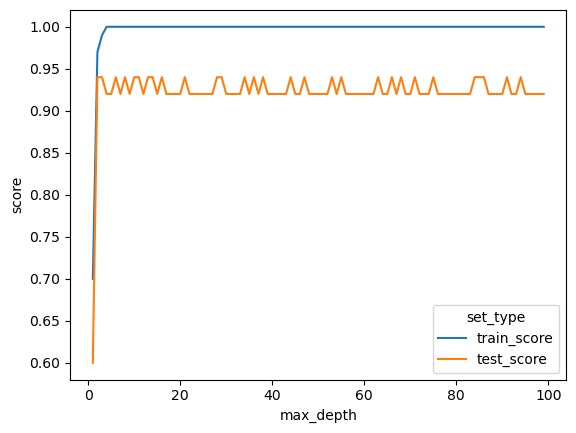

In [106]:
sns.lineplot(x="max_depth",y="score",hue="set_type",data=scores_data_long)